# Case Housing Prices

## Etapas - 2a parte

- Limpeza de Dados e EDA
- Modelagem e Avaliaçao do Modelo - Parte I 

- Modelagem e Avaliação do Modelo - Parte II
- Solução Proposta para a Modelagem e Avaliaçao do Modelo

# Apresentação do Case

<br>
<img src="https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F1139584112%2F0x0.jpg" width="950" />
<br>

No nosso exemplo vamos modelar uma regressão para explicar os preços das casas nos EUA.

    
Features:
- **price** - The last price the house was sold for
- **num_bed** - The number of bedrooms
- **num_bath** - The number of bathrooms (fractions mean the house has a toilet-only or shower/bathtub-only bathroom)
- **size_house** (includes basement) - The size of the house
- **size_lot** - The size of the lot
- **num_floors** - The number of floors
- **is_waterfront** - Whether or not the house is a waterfront house (0 means it is not a waterfront house whereas 1 means that it is a waterfront house)
- **condition** - How worn out the house is. Ranges from 1 (needs repairs all over the place) to 5 (the house is very well maintained)
- **size_basement** - The size of the basement
- **year_built** - The year the house was built
- **renovation_date** - The year the house was renovated for the last time. 0 means the house has never been renovated
- **zip** - The zip code
- **latitude** - Latitude
- **longitude** - Longitude
- **avg_size_neighbor_houses** - The average house size of the neighbors
- **avg_size_neighbor_lot** - The average lot size of the neighbors

O dataset foi simplificado para a aula (algumas features foram excluídas). Dados originais disponíveis no Kaggle [clicando aqui](https://www.kaggle.com/harlfoxem/housesalesprediction)

--------------

Daremos algumas dicas e sugestões do que inspecionar/analisar, mas podem pensar em em outras questões. 
Na etapa de planejamento, tentem se lembrar de funções, bibliotecas que vocês podem utilizar para realizar essas etapas.

# Inspeção Inicial

In [1]:
# Ler todas as bibliotecas aqui
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ler os dados aqui
#path = 'house_pricing.csv'
path = '/content/drive/MyDrive/Automated_ML_and_Deploy/Aula11_20230505/house_pricing.csv'
df_houses = pd.read_csv(path, sep=',')
df_houses.head()

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,239000,3,1.0,1510,15022,1.0,0,3,0,1962,0,98003,47.330433,-122.303609,1510,12970
1,1260000,3,3.5,3220,3960,2.0,0,3,460,1991,0,98116,47.590933,-122.384230,3080,4444
2,414500,3,1.0,1050,6002,1.0,0,3,210,1941,0,98115,47.698761,-122.316010,1180,6003
3,252500,3,2.5,1780,7192,1.0,0,4,530,1974,0,98031,47.409319,-122.173484,1870,8500
4,389000,3,1.0,1330,3740,1.5,0,3,0,1903,0,98118,47.550242,-122.274232,1330,5053


- Quantidade de linhas, quantidade de colunas
- Titulo das colunas e o que elas significam (comparar com a descrição inicial. Elas fazem sentido?)
- Tipo dos dados, não apenas se são numéricas ou texto. O que elas são de fato. São numéricas mas deveriam ser categorias ou datetime?
- Visão geral dos valores que as variáveis podem assumir (análise de inconsistências nos dados)
- Duplicatas (linhas e colunas)?
- Missing Values

Codificar o planejamento e Registrar o que foi encontrado em forma de texto, como se estivesse fazendo um relatório sobre seus achados.

In [ ]:
df_houses.shape

(1845, 16)

In [ ]:
# checando o tipo dos dados
df_houses.dtypes
#df_houses.info()

price                         int64
num_bed                       int64
num_bath                    float64
size_house                    int64
size_lot                      int64
num_floors                  float64
is_waterfront                 int64
condition                     int64
size_basement                 int64
year_built                    int64
renovation_date               int64
zip                           int64
latitude                    float64
longitude                   float64
avg_size_neighbor_houses      int64
avg_size_neighbor_lot         int64
dtype: object

- **price** - Ainda que esperássemos um tipo float, o tipo int também cabe nessa variável.
- **num_bed** - O tipo inteiro é apropriado
- **num_bath** - Inicialmente, parece estranho, mas essa variável estar como float reflete algo relacionado ao negócio (forma como os banheiros são vistos no USA)
- **size_house** - O tipo inteiro é apropriado
- **size_lot** - O tipo inteiro é apropriado
- **num_floors** - O tipo float parece estranho, mas pode ser a mesma lógica de num_bath.
- **is_waterfront** - Essa variável é qualitativa. Assim, poderia ser definida como object. Porém, notamos que é uma variável do tipo dummy, ou seja, já foi convertida para número e pode ser utilizada na modelagem
- **condition** - Essa variável poderia vir como object, já que traz uma característica qualitativa. Porém, o próprio dataset já a trata como numérica. Assim, vou admitir que as ditâncias entre os níveis qualidade do imóvel estão igualmente espaçados e tem a referência 1. Ou seja, é uma varíavel ratio e podemos usá-la da forma que está
- **size_basement** - O tipo inteiro é apropriado
- **year_built** - O tipo inteiro é apropriado
- **renovation_date** - O tipo inteiro é apropriado
- **zip** - Aqui poderia ser inteiro ou object, podemos considerar como uma variável qualitativa.
- **latitude** - O tipo float é apropriado
- **longitude** - O tipo float é apropriado
- **avg_size_neighbor_houses** - O tipo inteiro é apropriado
- **avg_size_neighbor_lot** - O tipo inteiro é apropriado


In [ ]:
# vamos checar se há alguma inconsistência nas variáveis
df_houses.describe([.01, .05, .95, .99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
price,1845.0,557127.039024,403208.183409,81000.000000,158473.000000,210000.000000,457000.000000,1.234800e+06,1.980640e+06,7.062500e+06
num_bed,1845.0,3.379946,0.939221,0.000000,2.000000,2.000000,3.000000,5.000000e+00,6.000000e+00,9.000000e+00
num_bath,1845.0,2.140108,0.785074,0.000000,1.000000,1.000000,2.250000,3.500000e+00,4.500000e+00,6.750000e+00
size_house,1845.0,2128.444986,955.754345,410.000000,770.000000,950.000000,1950.000000,3.890000e+03,5.019200e+03,1.004000e+04
size_lot,1845.0,15642.503523,41323.934402,649.000000,1008.240000,1985.000000,7700.000000,4.570820e+04,2.128657e+05,1.024068e+06
num_floors,1845.0,1.518970,0.549520,1.000000,1.000000,1.000000,1.500000,2.000000e+00,3.000000e+00,3.500000e+00
is_waterfront,1845.0,0.014092,0.117903,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
condition,1845.0,3.382114,0.634172,1.000000,2.440000,3.000000,3.000000,5.000000e+00,5.000000e+00,5.000000e+00
size_basement,1845.0,290.643902,461.995804,0.000000,0.000000,0.000000,0.000000,1.200000e+03,1.720000e+03,4.820000e+03
year_built,1845.0,1971.820054,29.097993,1900.000000,1904.000000,1916.000000,1976.000000,2.012000e+03,2.014000e+03,2.015000e+03


- Valores Negativos: O único valor negativo é de longitude e é aceitável.

- Zeros: Vemos que, além das variáveis is_waterfront, size_basement e renovation_date que, em tese, poderiam admitir tais valores, de acordo com a descrição dos dados, as variaveis num_bed e num_bath também aparecem com valores zero. Ou seja, isso significa que existem casas com 0 banheiros e 0 quartos?????

In [ ]:
# Checando valores únicos nas variáveis de range limitado e classes
list_unique_check = ['is_waterfront', 'condition', 'zip']
for col in list_unique_check:
    unique_values = df_houses[col].unique()
    print(f'A coluna {col} possui {len(unique_values)} valores distintos, que são: {unique_values}')

A coluna is_waterfront possui 2 valores distintos, que são: [0 1]
A coluna condition possui 5 valores distintos, que são: [3 4 5 2 1]
A coluna zip possui 70 valores distintos, que são: [98003 98116 98115 98031 98118 98103 98023 98042 98112 98075 98117 98058
 98002 98146 98034 98038 98133 98125 98168 98004 98005 98056 98053 98029
 98119 98052 98028 98033 98030 98199 98001 98109 98072 98166 98155 98007
 98077 98027 98055 98006 98107 98188 98008 98126 98144 98011 98177 98136
 98032 98059 98070 98019 98198 98102 98065 98092 98022 98178 98106 98040
 98105 98010 98074 98122 98045 98039 98024 98108 98014 98148]


- Valores Únicos: De fato as variáveis citadas possuem os valores únicos descritos no início do problema. Ja a variável zip, como esperado, possui diversos possiveis valores.

In [ ]:
# checando duplicadas nas linhas


In [ ]:
# checando duplicadas nas colunas


- Duplicatas: Não foram encontradas nem duplicatas nas linhas nem nas colunas.

In [ ]:
# checando missing values


- Missing Values: Sem missing values no dataset

# Análise Exploratória de Dados (EDA)

## Train Test Split

Seria interessante se você:
- Estudasse as distribuições das variáveis (histogramas, boxplots, Quartis, Valor Máximo e Mínimo)
- Estudasse as relações entre as variáveis envolvidas (gráficos de dispersão, histogramas, boxplots, testes de correlação e associação, entre outros)
- Levantasse questionamentos sobre os problemas (levante hipóteses sobre os dados e tente respondê-las usando suas análises)

Detalhe: Antes de iniciar a análise exploratória, dividam os dados em treino e teste. 

In [ ]:
df_train_houses, df_test_houses = train_test_split(df_houses, train_size=0.7, random_state=123)

De agora em diante lidaremos apenas com o nosso conjunto de treinamento.

**Dica: Revisitem Notebooks de aulas anteriores para utilizar os codes que desenvolvemos.**

## Análise Bi-variada - Correlação

In [ ]:
#Pearson

feature_list = []
corr_pearson = []
pvalue_pearson = []
for col in df_train_houses.columns:
  feature_list.append(col)
  cor, p = scipy.stats.pearsonr(df_train_houses[col], df_train_houses['price'])

  if np.round(p,4) <= 0.0500:
      print(f'\033[32mp-value: {np.round(p,4)},  correlation: {np.round(cor,4)}')
      print(f'\033[32mExiste correlação sigbificativa diferente de zero entre {col} e price.')
      print(f'\033[0m{"--"*30}')
      corr_pearson.append(np.round(cor,4))
      pvalue_pearson.append(np.round(p,4))

  if np.round(p,4) > 0.0500:
      print(f'\033[91mp-value: {np.round(p,4)},  correlation: {np.round(cor,4)}')
      print(f'\033[91mNão existe correlação siginificativa diferente de zero entre {col} e price.')
      print(f'\033[0m{"--"*30}')
      corr_pearson.append(np.round(cor,4))
      pvalue_pearson.append(np.round(p,4))


p-value: 0.0,  correlation: 1.0
Existe correlação sigbificativa diferente de zero entre price e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.2883
Existe correlação sigbificativa diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.5169
Existe correlação sigbificativa diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.732
Existe correlação sigbificativa diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.1147
Existe correlação sigbificativa diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.206
Existe correlação sigbificativa diferente de zero entre num_floors e price.
----------------------------------------------

In [ ]:
#Spearman

feature_list = []
corr_spearman = []
pvalue_spearman = []
for col in df_train_houses.columns:
  feature_list.append(col)
  cor, p = scipy.stats.spearmanr(df_train_houses[col], df_train_houses['price'])
  if p <= 0.05:
      print(f'\033[32mp-value: {np.round(p,4)},  correlation: {np.round(cor,4)}')
      print(f'\033[32mExiste correlação sigbificativa diferente de zero entre {col} e price.')
      print(f'\033[0m{"--"*30}')
      corr_spearman.append(np.round(cor,4))
      pvalue_spearman.append(np.round(p,4))

  else:
      print(f'\033[91mp-value: {np.round(p,4)},  correlation: {np.round(cor,4)}')
      print(f'\033[91mNão existe correlação siginificativa diferente de zero entre {col} e price.')
      print(f'\033[0m{"--"*30}')
      corr_spearman.append(np.round(cor,4))
      pvalue_spearman.append(np.round(p,4))

p-value: 0.0,  correlation: 1.0
Existe correlação sigbificativa diferente de zero entre price e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.3382
Existe correlação sigbificativa diferente de zero entre num_bed e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.5075
Existe correlação sigbificativa diferente de zero entre num_bath e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.6758
Existe correlação sigbificativa diferente de zero entre size_house e price.
------------------------------------------------------------
p-value: 0.0001,  correlation: 0.1076
Existe correlação sigbificativa diferente de zero entre size_lot e price.
------------------------------------------------------------
p-value: 0.0,  correlation: 0.2909
Existe correlação sigbificativa diferente de zero entre num_floors e price.
-----------------------------------------

In [ ]:
df_corr_pearson = pd.DataFrame({'feature':feature_list,
                                'corr_pearson': corr_pearson,
                                'pvalue_pearson': pvalue_pearson,
                                'corr_spearman': corr_spearman,
                                'pvalue_spearman': pvalue_spearman})

def color_high_pvalue(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >.05 else 'black'
    return 'color: %s' % color

df_corr_pearson.style.applymap(color_high_pvalue, subset = ['pvalue_pearson', 'pvalue_spearman'])

,feature,corr_pearson,pvalue_pearson,corr_spearman,pvalue_spearman
0,price,1.000000,0.000000,1.000000,0.000000
1,num_bed,0.288300,0.000000,0.338200,0.000000
2,num_bath,0.516900,0.000000,0.507500,0.000000
3,size_house,0.732000,0.000000,0.675800,0.000000
4,size_lot,0.114700,0.000000,0.107600,0.000100
5,num_floors,0.206000,0.000000,0.290900,0.000000
6,is_waterfront,0.346100,0.000000,0.155800,0.000000
7,condition,0.067700,0.015000,0.056400,0.042800
8,size_basement,0.408300,0.000000,0.299500,0.000000
9,year_built,0.006800,0.808300,0.045700,0.101000


* No teste de correlação:
** H0: Não existe correlação >0 siginificativa
** H1: Existe correlação >0 siginificativa

Logo:
* p-value < 0.05 indica que podemos rejeitar H0 e assumir que existe correlação > 0
* p-value > .05 indica que não há correlação > 0

In [ ]:
# matriz de correlação
def matriz_corr(method:str):
  '''
  Função para plotar matriz de correlação utilizando mapa de calor

  Args
  method: ['pearson, 'spearman]
  '''
  
  plt.figure(figsize=(15,8))
  plt.title(f'Correlação de {str.capitalize(method)}')
  sns.heatmap(df_train_houses.corr(method = method).round(2), annot = True, vmin = -1, vmax = 1)
  plt.show()

#Chamando a função matriz_corr considerando pearson e spearman
matriz_corr(?)
matriz_corr(?)

In [ ]:
# Isolando a correlação com a feature Price:
def corr_price(method: str):
  '''
  Função para plotar um gráfico de barras indicando a correlação da feature Price com as demais

  Args
  method: ['pearson, 'spearman]
  '''
  df_corr_price = df_train_houses.corr(method = method).round(2)['price'].reset_index().rename(columns=({'price' : 'corr_price'}))
  df_corr_price = df_corr_price.sort_values('corr_price', key = np.abs, ascending = True)
  df_corr_price.set_index('index', inplace = True)
  df_corr_price.plot.barh(title = f'Correlação de {str.capitalize(method)}');
  return df_corr_price.reset_index();

#Chamando a função corr_price considerando pearson e spearman
df_corr_price_pearson = corr_price(?);
df_corr_price_spearman = corr_price(?);

## Removendo features com pvalue > 0.05 para correlação, indicando não haver corr significativa

In [ ]:
mdl_cols = df_corr_pearson.loc[df_corr_pearson.pvalue_pearson <= 0.05].feature.tolist()
mdl_cols

['price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

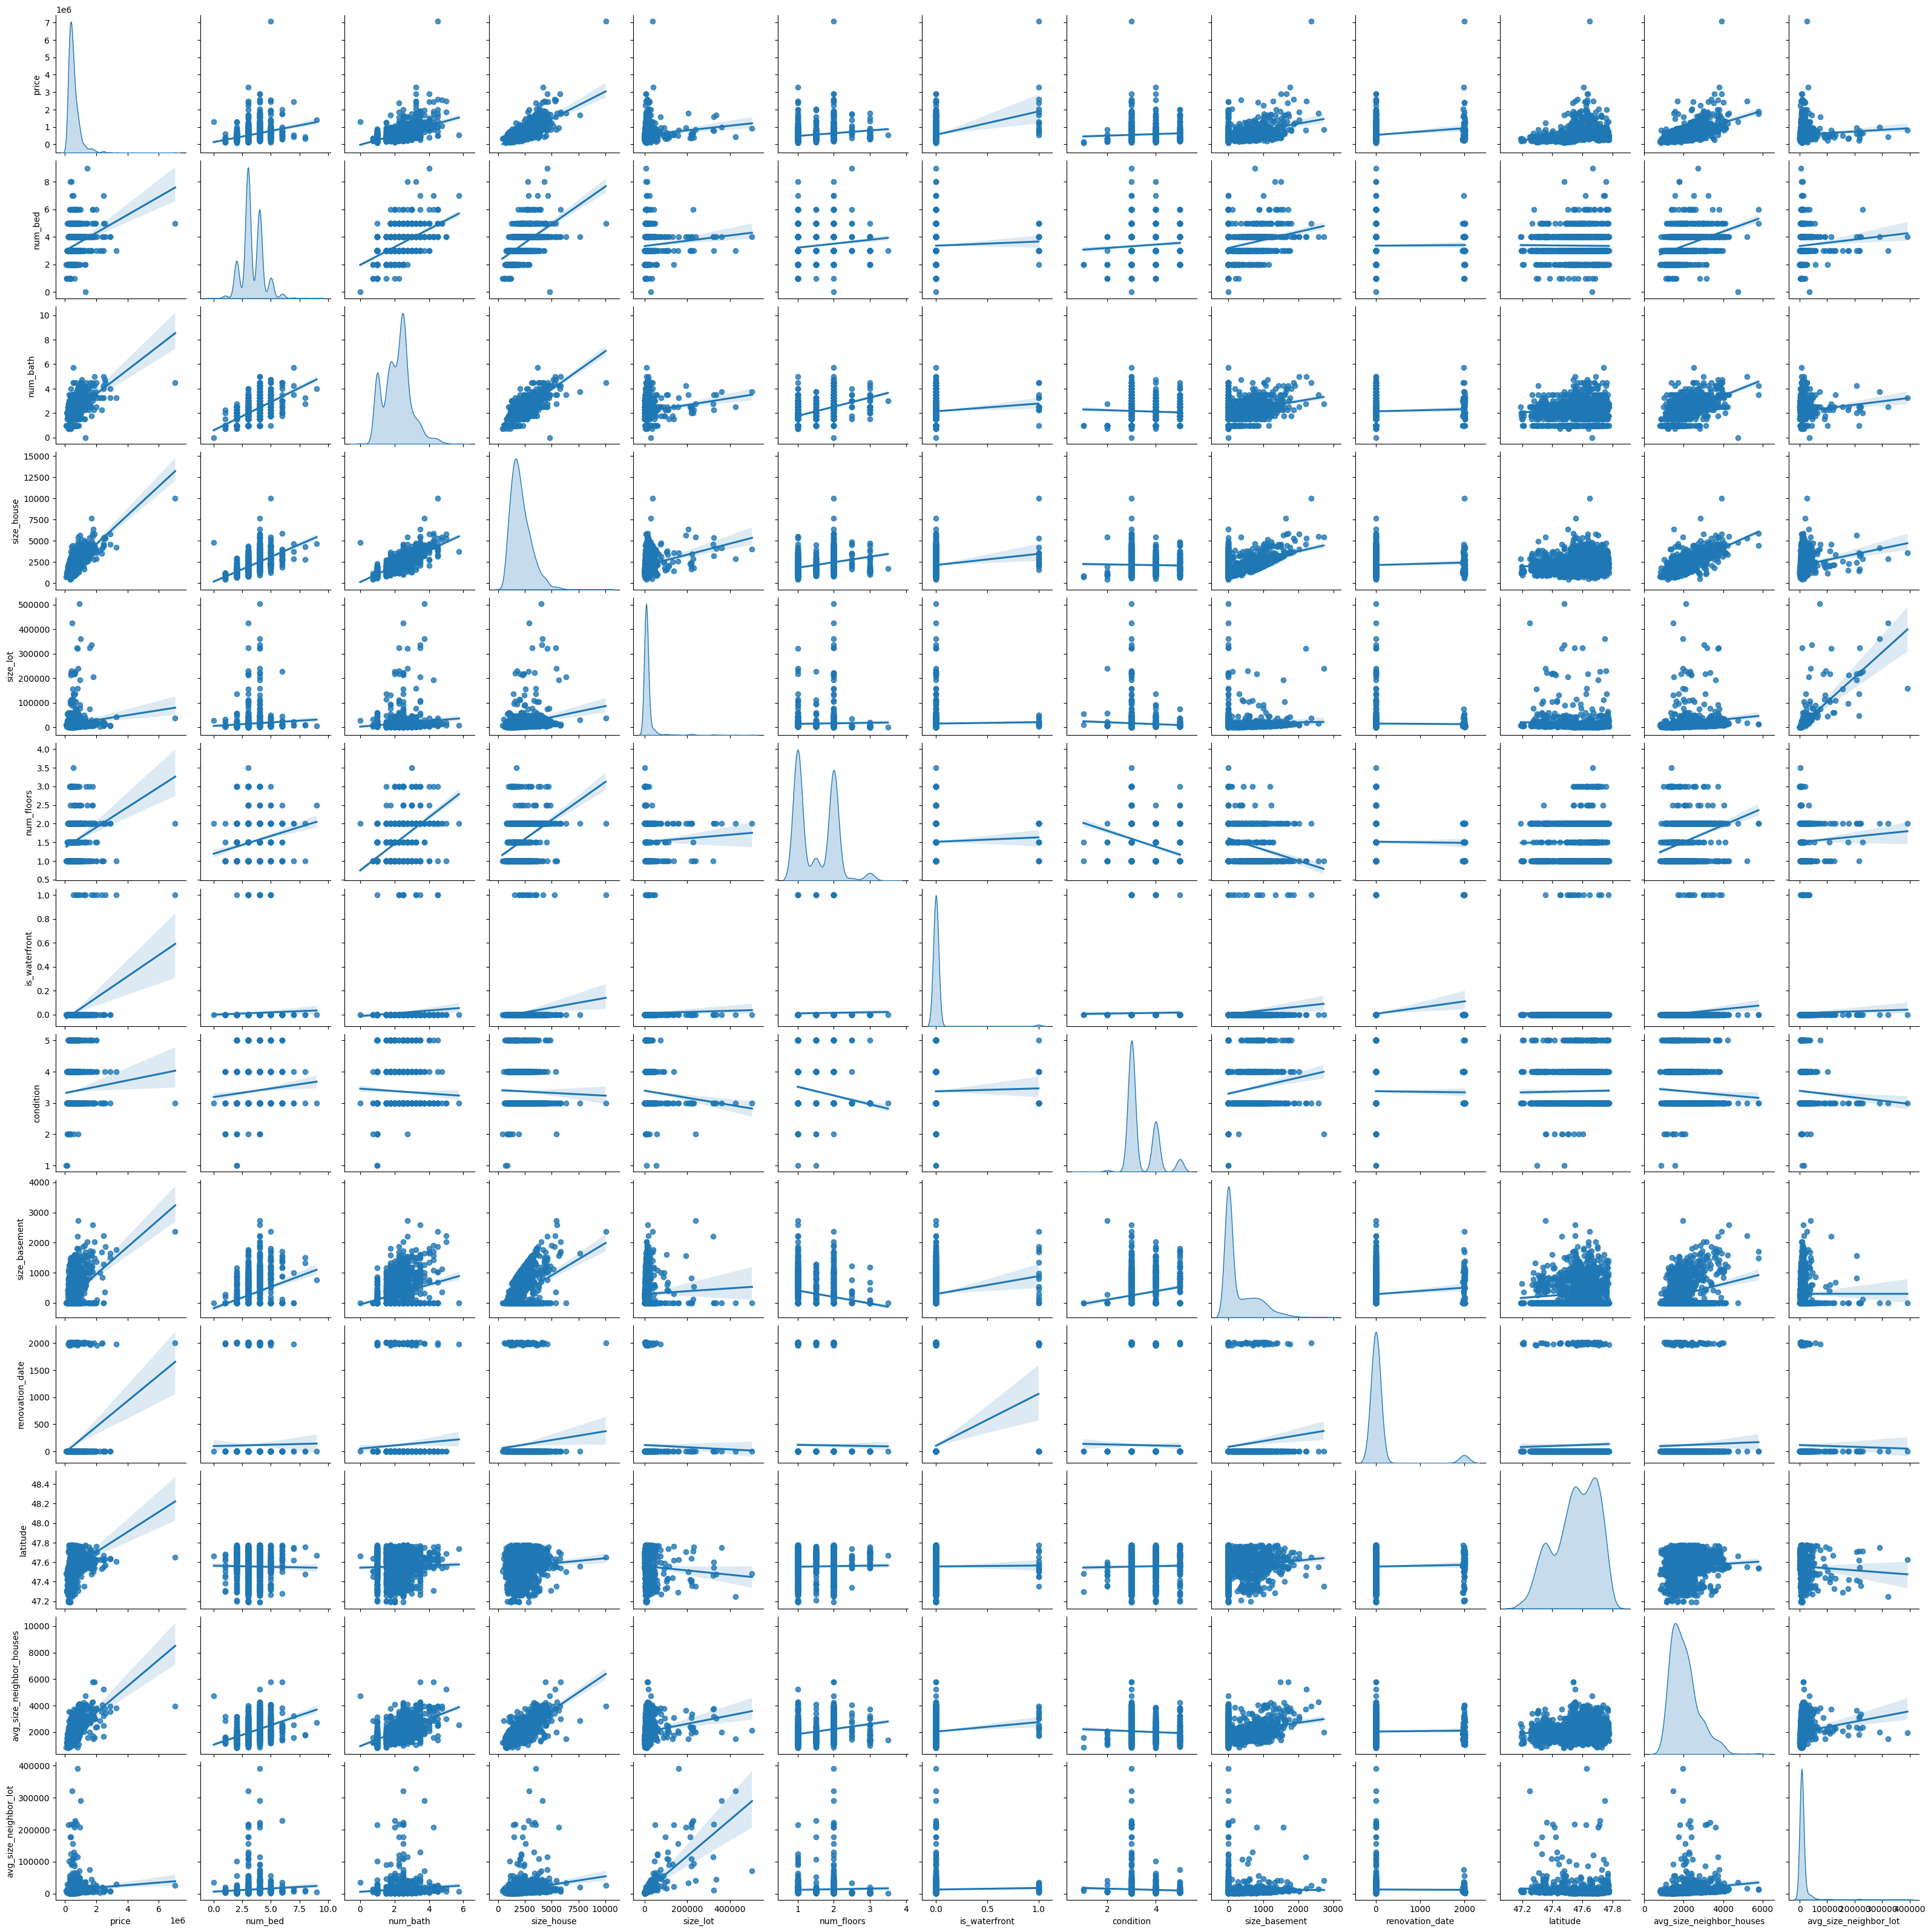

In [ ]:
# pairplot
sns.pairplot(df_train_houses[mdl_cols], diag_kind='kde', kind='reg')
plt.show()

# Modelagem e Avaliação dos Resultados

Nessa fase, espera-se que você crie o modelo com as 10 variáveis que foram selecionadas e avalie o modelo checando os critérios que estudamos:
- Multicolinearidade
- Homocedasticidade dos resíduos
- Autocorrelação dos Resíduos
- Média 0 nos resíduos
- Estatística F
- P-valores
- MAE, MAPE, MSE, R2

# Modelo LR #1

## Multicolinearidade

In [ ]:
def multicolinearidade(df, features):
    # VIF dataframe 
    vif_data = pd.DataFrame() 
    vif_data["feature"] = df.loc[:,features].columns 

    # calculando VIF 
    vif_data["VIF"] = [variance_inflation_factor(df.loc[:,features].values, i) for i in range(len(df.loc[:,features].columns))] 
    return vif_data.sort_values(by='VIF', ascending=False)

In [ ]:
mdl_cols

['price',
 'num_bed',
 'num_bath',
 'size_house',
 'size_lot',
 'num_floors',
 'is_waterfront',
 'condition',
 'size_basement',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

In [ ]:
cols_x = mdl_cols.copy()
cols_x.remove('price')
multicolinearidade(df_train_houses, cols_x)

,feature,VIF
9,latitude,60.931255
6,condition,33.539843
2,size_house,30.583844
1,num_bath,26.396140
10,avg_size_neighbor_houses,22.693895
0,num_bed,22.437622
4,num_floors,17.128732
11,avg_size_neighbor_lot,2.891519
3,size_lot,2.878108
7,size_basement,2.555861


Via de regra, considera-se features com VIF > 13 como com alta multicolinearidade. No entanto, por bom senso sabemos que as features nesta condição são independentes uma das outras e por isso serão mantidas

In [ ]:
X_train = df_train_houses[cols_x]
X_train = sm.add_constant(X_train)
y_train = df_train_houses['price']
mdl_lr = sm.OLS(y_train, X_train)
mdl_lr = mdl_lr.fit()

X_test = df_test_houses[cols_x]
X_test = sm.add_constant(X_test)
y_test = df_test_houses['price']

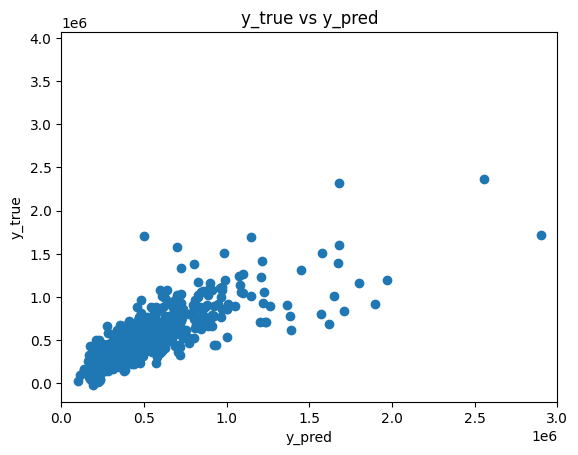

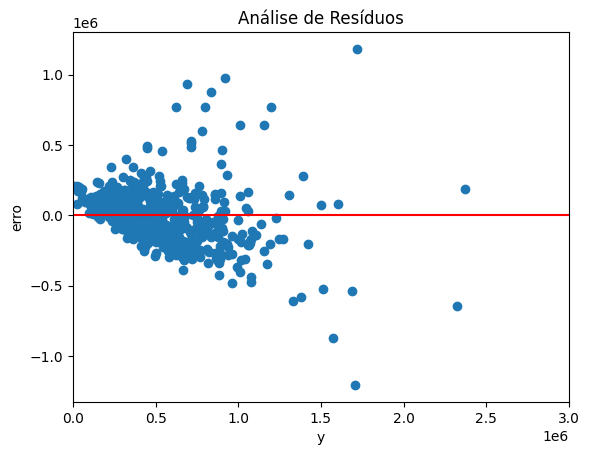

R2: 0.658
MSE: 46906297232.8
RMSE: 216578.6
MAE: 153300.4
MAPE: 0.3126


In [ ]:
y_pred_mdl_lr = mdl_lr.predict(X_test)
plt.scatter(x = y_test, y = y_pred_mdl_lr)
plt.title('y_true vs y_pred')
plt.xlim(0, 3e6)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

y_pred_mdl_lr = mdl_lr.predict(X_test)
erro = (y_test - y_pred_mdl_lr)
plt.scatter(x = np.round(y_pred_mdl_lr,2), y = erro)
plt.title('Análise de Resíduos')
plt.xlim(0, 3e6)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()

#Metricas
print(f'R2: {np.round(r2_score(y_test, y_pred_mdl_lr),4)}')
print(f'MSE: {np.round(mean_squared_error(y_test, y_pred_mdl_lr),1)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(y_test, y_pred_mdl_lr)),1)}')
print(f'MAE: {np.round(mean_absolute_error(y_test, y_pred_mdl_lr),1)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(y_test, y_pred_mdl_lr),4)}')

O gráfico de resíduos indica clara presença de heterocedasticidade, indicando que algum padrão não foi capturado pelo modelo linear.

# Modelo LR #2

## Autocorrelação nos Resíduos

* O teste Durbin-Watson é uma medida de autocorrelação em residuais de um modelo de regressão. O teste Durbin-Watson utiliza uma escala de 0 a 4, com valores de 0 a 2 indicando autocorrelação positiva, 2 indicando ausência de autocorrelação e 2 a 4 indicando autocorrelação negativa.

In [ ]:
print(mdl_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     249.5
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        03:03:43   Log-Likelihood:                -17757.
No. Observations:                1291   AIC:                         3.554e+04
Df Residuals:                    1278   BIC:                         3.561e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

O teste Durbin-Watson é uma medida de autocorrelação em residuais de um modelo de regressão. O teste Durbin-Watson utiliza uma escala de 0 a 4, com valores de 0 a 2 indicando autocorrelação positiva, 2 indicando ausência de autocorrelação e 2 a 4 indicando autocorrelação negativa.

Neste modelo o valor de Durbin-Watson está bem próximo de 2, indicando ausência de autocorrelação.

## Estatistica F

A estatística F é baseada na razão de duas variâncias: a variância explicada (devido ao modelo) e a variância não explicada (resíduos). Em outras palavras, a estatística F compara a variância explicada (devido ao modelo) e a variância não explicada (resíduos). Ao comparar essas variâncias, a estatística F nos ajuda a determinar se o modelo de regressão explica significativamente a variação na variável dependente ou se a variação pode ser atribuída ao acaso. Uma estatística F maior pode indicar que o modelo é responsável por uma parte substancial da variância total, enquanto uma estatística F menor sugere que o modelo pode não explicar muito da variância e, portanto, pode não ser visto como um modelo útil. A estatística f é calculada a partir da seguinte fórmula:

f = MSR / MSE

= Soma média da regressão quadrada / Soma média do erro quadrado

A estatística F segue uma distribuição F, e seu valor ajuda a determinar a probabilidade (valor p) de observar tal estatística se a hipótese nula for verdadeira (ou seja, nenhuma relação entre as variáveis dependentes e independentes). Se o valor p for menor que um nível de significância predeterminado (por exemplo, 0,05), a hipótese nula é rejeitada e concluímos que o modelo de regressão é estatisticamente significativo.
https://vitalflux.com/interpreting-f-statistics-in-linear-regression-formula-examples/

Neste modelo a estatística F aponta que a regressão é válida.

## Pvalue para cada feature
Features com pvalue > .05 indicam que o coeficiente calculado não é estatisticamente significativo, e assim recomenda-se serem eliminados.

In [ ]:
for c in ['num_bath','size_lot','num_floors','size_basement']:
  cols_x.remove(c)
cols_x


['num_bed',
 'size_house',
 'is_waterfront',
 'condition',
 'renovation_date',
 'latitude',
 'avg_size_neighbor_houses',
 'avg_size_neighbor_lot']

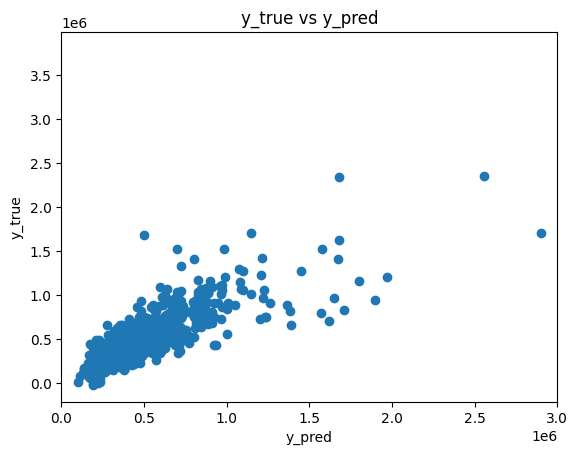

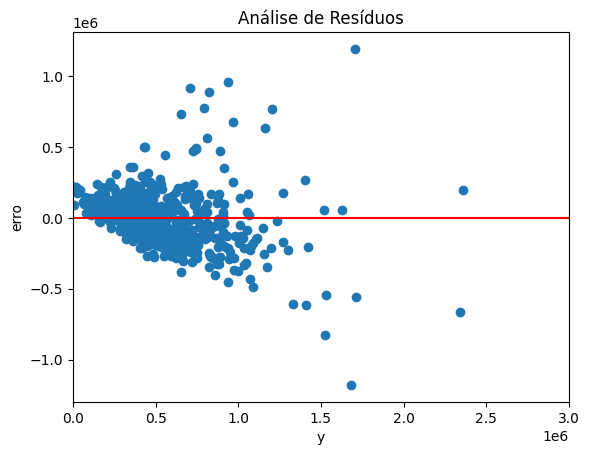

R2: 0.6605
MSE: 46559909034.4
RMSE: 215777.5
MAE: 153321.8
MAPE: 0.3138


In [ ]:
X_train = df_train_houses[cols_x]
X_train = sm.add_constant(X_train)
y_train = df_train_houses['price']
mdl_lr2 = sm.OLS(y_train, X_train)
mdl_lr2 = mdl_lr2.fit()

X_test = df_test_houses[cols_x]
X_test = sm.add_constant(X_test)
y_test = df_test_houses['price']

###################################################
#plot y_pred vs y_true
y_pred_mdl_lr2 = mdl_lr2.predict(X_test)
plt.scatter(x = y_test, y = y_pred_mdl_lr2)
plt.title('y_true vs y_pred')
plt.xlim(0, 3e6)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()
##################################################
#plot residues
erro = (y_test - y_pred_mdl_lr2)
plt.scatter(x = np.round(y_pred_mdl_lr2,2), y = erro)
plt.title('Análise de Resíduos')
plt.xlim(0, 3e6)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()
##################################################
#Metricas
print(f'R2: {np.round(r2_score(y_test, y_pred_mdl_lr2),4)}')
print(f'MSE: {np.round(mean_squared_error(y_test, y_pred_mdl_lr2),1)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(y_test, y_pred_mdl_lr2)),1)}')
print(f'MAE: {np.round(mean_absolute_error(y_test, y_pred_mdl_lr2),1)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(y_test, y_pred_mdl_lr2),4)}')

In [ ]:
print(mdl_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     372.3
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        03:03:52   Log-Likelihood:                -17761.
No. Observations:                1291   AIC:                         3.554e+04
Df Residuals:                    1282   BIC:                         3.559e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Modelo LR #3

## Teste de Normalidade

#Teste Shapiro-Wilk
* A hipótese nula (H0) do teste de Shapiro-Wilk é que a amostra segue uma distribuição normal. Ou seja, a H0 afirma que não há diferença estatisticamente significativa entre a distribuição observada e a distribuição normal teórica.
* Se o valor p for menor que o nível de significância escolhido, geralmente 0,05, então rejeitamos a H0 em favor da hipótese alternativa de que a amostra não segue uma distribuição normal. Se o valor p for maior que o nível de significância escolhido, então não há evidências suficientes para rejeitar a H0 e podemos assumir que a amostra segue uma distribuição normal.

In [ ]:
#Teste Shapiro Wilk
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print('p-valor: p=%.3f' % (p))
    # interpret
    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

<ipython-input-165-b08421308723>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_houses['price'])


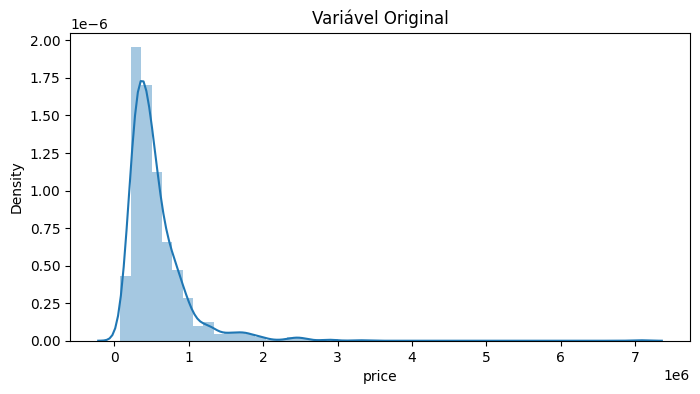

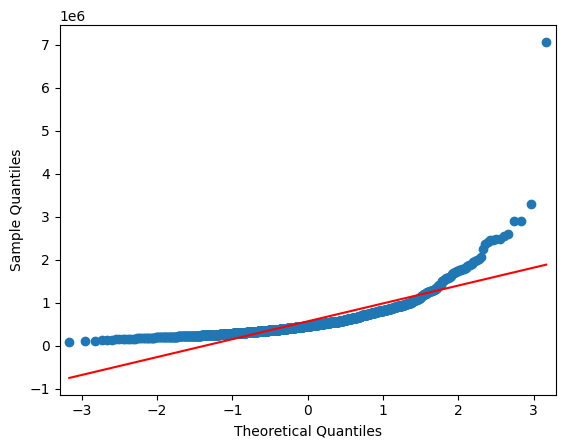

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


In [ ]:
#Histograma
plt.figure(figsize = (8, 4))
sns.distplot(df_train_houses['price'])
plt.title('Variável Original')
plt.show()

#QQplot
sm.qqplot(df_train_houses['price'], line='s')
plt.show()

#ShpairoWilk
stat_normal, p_normal = shapiro_test(df_train_houses['price'])
from scipy import stats

### Transformação Logaritmica

<ipython-input-166-1bd5308637a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_houses['price_log'])


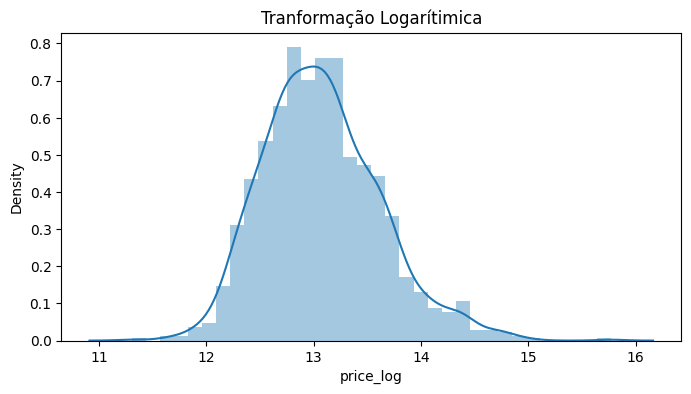

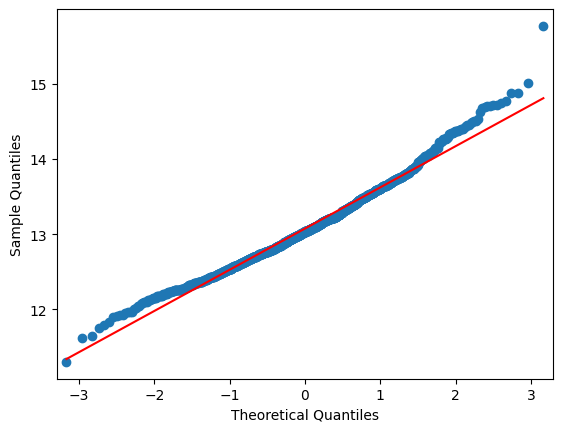

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


In [ ]:
df_train_houses['price_log'] = np.log(df_train_houses['price'])
#Histograma
plt.figure(figsize = (8, 4))
sns.distplot(df_train_houses['price_log'])
plt.title('Tranformação Logarítimica')
plt.show()

#QQPlot
sm.qqplot(df_train_houses['price_log'], line='s')
plt.show()

#ShpairoWilk
stat_normal, p_normal = shapiro_test(df_train_houses['price_log'])
from scipy import stats

* Apesar de não ter passado no teste Shapiro-Wilk, a distribuição está muito mais próxima de uma normal

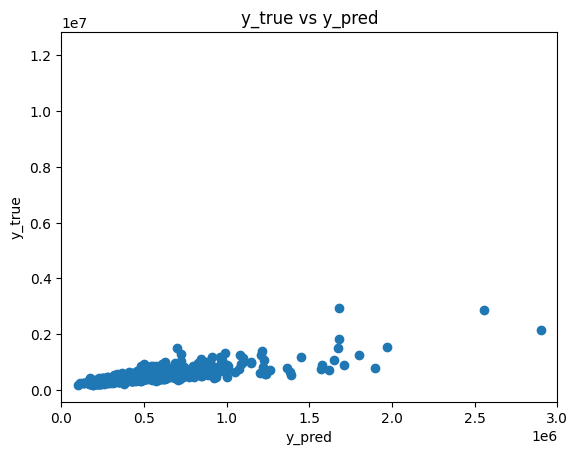

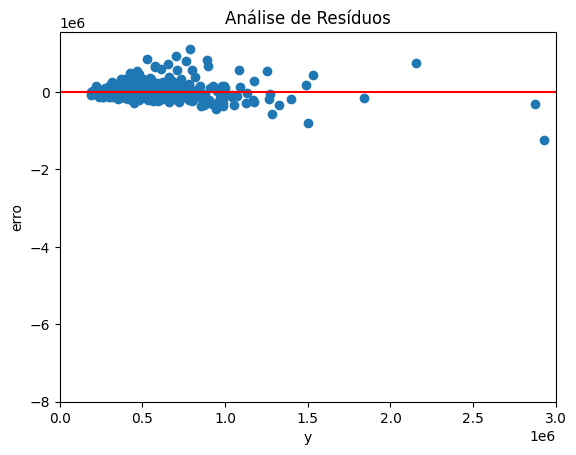

R2: -0.0322
MSE: 141567430074.1
RMSE: 376254.5
MAE: 139616.6
MAPE: 0.2331


In [ ]:
X_train = df_train_houses[cols_x]
X_train = sm.add_constant(X_train)
y_train = df_train_houses['price_log']
mdl_lr3 = sm.OLS(y_train, X_train)
mdl_lr3 = mdl_lr3.fit()

X_test = df_test_houses[cols_x]
X_test = sm.add_constant(X_test)
y_test = df_test_houses['price']

###################################################
#plot y_pred vs y_true
y_pred_mdl_lr3_log = mdl_lr3.predict(X_test)
#inversa do np.log
y_pred_mdl_lr3 = np.exp(y_pred_mdl_lr3_log)

plt.scatter(x = y_test, y = y_pred_mdl_lr3)
plt.title('y_true vs y_pred')
plt.xlim(0, 3e6)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()
##################################################
#plot residues
erro = (y_test - y_pred_mdl_lr3)
plt.scatter(x = np.round(y_pred_mdl_lr3,2), y = erro)
plt.title('Análise de Resíduos')
plt.xlim(0, 3e6)
plt.axhline(0, color='r')
plt.xlabel('y')
plt.ylabel('erro')
plt.show()
##################################################
#Metricas
print(f'R2: {np.round(r2_score(y_test, y_pred_mdl_lr3),4)}')
print(f'MSE: {np.round(mean_squared_error(y_test, y_pred_mdl_lr3),1)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(y_test, y_pred_mdl_lr3)),1)}')
print(f'MAE: {np.round(mean_absolute_error(y_test, y_pred_mdl_lr3),1)}')
print(f'MAPE: {np.round(mean_absolute_percentage_error(y_test, y_pred_mdl_lr3),4)}')

# Conclusões

1. O Modelo de Regressão Linear com melhores métricas foi o mld_lr2, no qual foram eliminadas as features sem correlação estatisticamente significativa.
* R2: 0.6605
* MSE: 46559909034.4
* RMSE: 215777.5
* MAE: 153321.8
* MAPE: 0.3138

2. Apesar disso, o modelo # está longe de ser considerado um modelo com métricas satisfatórias. Muito provavelmente a relação entre a variavel target e as preditoras não é do tipo linear.

3. Modelos baseados em árvore deverão ser testados como próximos passos.